In [90]:
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [92]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,28720.271484,31285268319
2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707
2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226562,29432.226562,17274840442
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352


In [93]:
df.isna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,False,False,False,False,False,False
2014-09-18,False,False,False,False,False,False
2014-09-19,False,False,False,False,False,False
2014-09-20,False,False,False,False,False,False
2014-09-21,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-05-28,False,False,False,False,False,False
2022-05-29,False,False,False,False,False,False
2022-05-30,False,False,False,False,False,False


In [94]:
# Count nulls TEST
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [95]:
# Drop coulmns
df.drop(columns=["Adj Close", "Volume"])

,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031
2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625


In [96]:
df.index = pd.to_datetime(df.index)

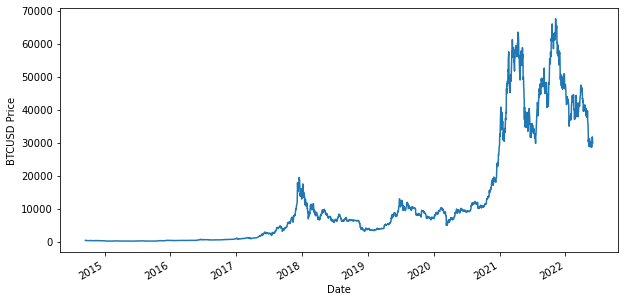

In [97]:
df.Close.plot(figsize=(10, 5))
plt.ylabel('BTCUSD Price')
plt.show()

<!-- # Ichimoku Cloud
The ichimoku cloud is a technical indicator that consists of five plots and a cloud. It can assist in displaying support, esistance, momentum, and trend in a single view. 
We adjusted the parameters for cryptocurrency pairs to 20, 60, 120, 30 because the crypto market is open 24/7 and more volatile than other assets.-->

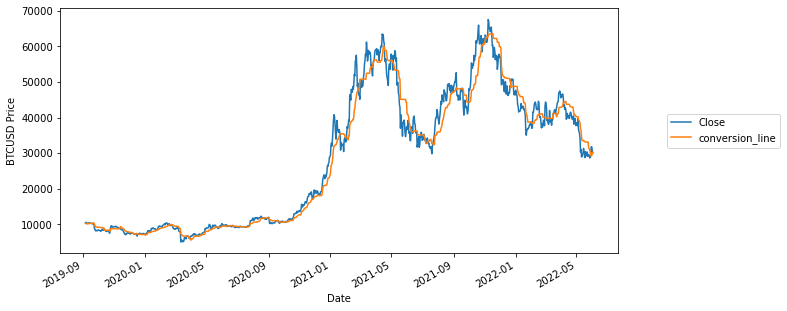

In [112]:
# Tenkansen (Conversion Line)
high_20 = df.High.rolling(20).max()
low_20 = df.Low.rolling(20).min()
df['conversion_line'] = (high_20 + low_20) / 2
conversion_line = df[['Close', 'conversion_line']]
conversion_line[-1000:].plot(figsize=(10, 5))
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.ylabel('BTCUSD Price')
plt.show()

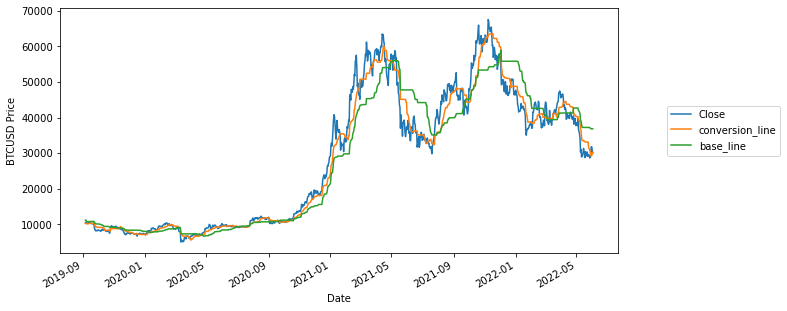

In [113]:
# Kijun-sen (Base Line)
high_60 = df.High.rolling(60).max()
low_60 = df.Low.rolling(60).min()
df['base_line'] = (high_60 + low_60) / 2

base_line = df[['Close', 'conversion_line', 'base_line']]
base_line[-1000:].plot(figsize=(10, 5))
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.ylabel('BTCUSD Price')
plt.show()

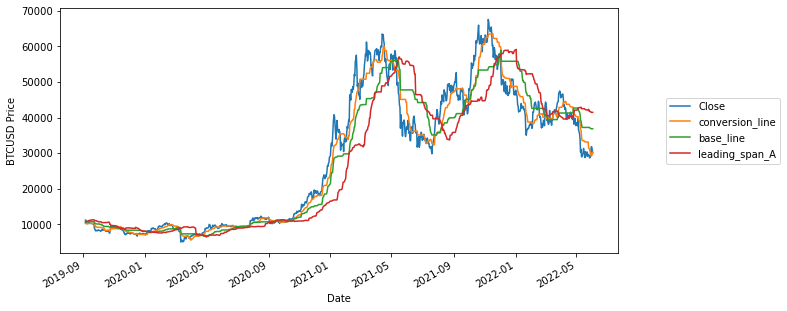

In [114]:
# Senkou Span A (Leading Span A)
df['leading_span_A'] = ((df.conversion_line + df.base_line) / 2).shift(30)

leading_span_A = df[['Close', 'conversion_line',
                     'base_line', 'leading_span_A']]

leading_span_A[-1000:].plot(figsize=(10, 5))
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.ylabel('BTCUSD Price')
plt.show()

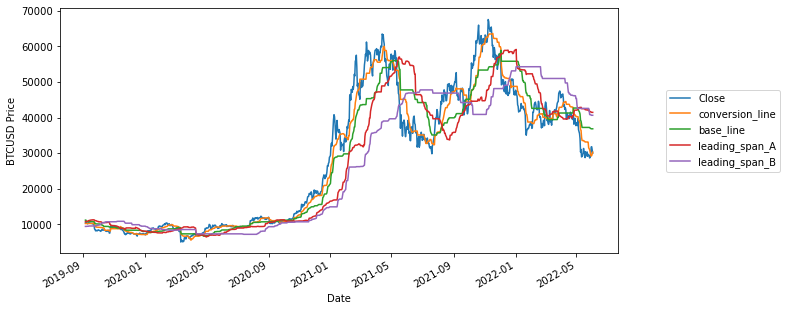

In [115]:
# Senkou Span B (Leading Span B)
high_120 = df.High.rolling(120).max()
low_120 = df.Low.rolling(120).min()
df['leading_span_B'] = ((high_120 + low_120) / 2).shift(30)

leading_span_B = df[['Close', 'conversion_line',
                     'base_line', 'leading_span_A', 'leading_span_B']]
leading_span_B[-1000:].plot(figsize=(10, 5))
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.ylabel('BTCUSD Price')
plt.show()

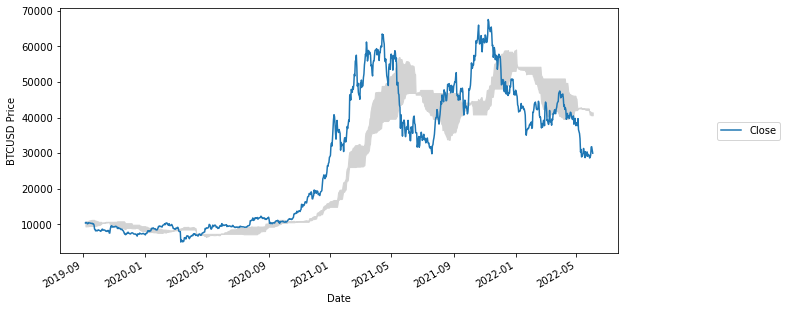

In [116]:
# Ichimoku Cloud
ichimoku_cloud = df[-1000:].Close.plot(figsize=(10, 5))
ichimoku_cloud.fill_between(
    df[-1000:].index, df[-1000:].leading_span_A, df[-1000:].leading_span_B, color='lightgrey')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.ylabel('BTCUSD Price')
plt.show()

In [117]:
# Entry 
df['signal'] = np.nan

# Prices are above the cloud
condition_1 = (df.Close > df.leading_span_A) & (df.Close > df.leading_span_B)

# leading Span A (senkou_span_A) is rising above the leading span B (senkou_span_B)
condition_2 = (df.leading_span_A > df.leading_span_B)

# Conversion Line (tenkan_sen) moves above Base Line (kijun_sen)
condition_3 = (df.conversion_line > df.base_line)

# Combine the conditions and store in the signal column 1 when all the conditions are true
df.loc[condition_1 & condition_2 & condition_3, 'signal'] = 1

In [118]:
# Exit 
# Prices are below the cloud
condition_1 = (df.Close < df.leading_span_A) & (df.Close < df.leading_span_B)

# leading Span A (senkou_span_A) is falling below the leading span B (senkou_span_B)
condition_2 = (df.leading_span_A < df.leading_span_B)

# Conversion Line (tenkan_sen) moves below Base Line (kijun_sen)
condition_3 = (df.conversion_line < df.base_line)

# Combine the conditions and store in the signal column 0 when all the conditions are true
df.loc[condition_1 & condition_2 & condition_3, 'signal'] = 0

df.signal.fillna(method='ffill', inplace=True)

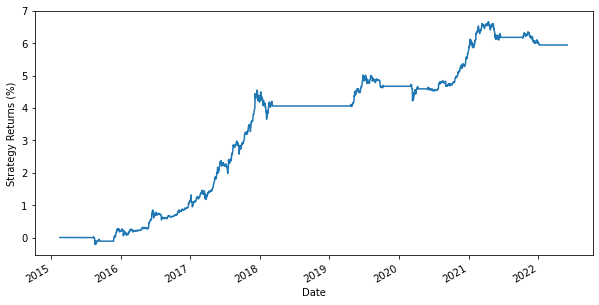

In [119]:
# Calculate daily returns
daily_returns = df.Close.pct_change()

# Calculate strategy returns
strategy_returns = daily_returns * df.signal.shift(1)
strategy_returns.dropna(inplace=True)

# Plot strategy returns
strategy_returns.cumsum().plot(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Strategy Returns (%)')
plt.show()

In [87]:
# Calculate Sharpe ratio for the excess returns 
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

# Sharpe ratio 
excess_daily_strategy_return = strategy_returns - 0.05/252
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print('Sharpe', sharpe)

Sharpe 1.006086970549656
